In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from Gaussian_Naive_Bayes.plot_confusion_matrix import plot_confusion_matrix

In [2]:
digits = load_digits()

In [3]:
X = digits.data
Y = digits.target

In [4]:
print(X.shape, Y.shape)

(1797, 64) (1797,)


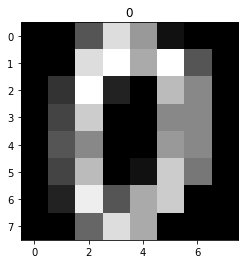

In [5]:
plt.imshow(X[0].reshape((8, 8)), cmap = 'gray')
plt.title(str(Y[0]))
plt.show()

In [6]:
print(X[0]) # 0 to 255, 0-> black, 255-> white

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [7]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [8]:
mnb.fit(X, Y)
gnb.fit(X, Y)

GaussianNB()

In [9]:
print(mnb.score(X, Y))
print(gnb.score(X, Y))

0.9053978853644964
0.8580968280467446


In [10]:
cross_val_score(gnb, X, Y, scoring = "accuracy", cv = 10)

array([0.76111111, 0.81666667, 0.90555556, 0.68333333, 0.73888889,
       0.83888889, 0.86666667, 0.86592179, 0.82681564, 0.81005587])

In [11]:
cross_val_score(gnb, X, Y, scoring = "accuracy", cv = 10).mean()

0.8113904407200497

In [12]:
cross_val_score(mnb, X, Y, scoring = "accuracy", cv = 10).mean()

0.8797858472998138

## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y, y_mnb)
print(cnf_matrix)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


KeyError: ' misclass='

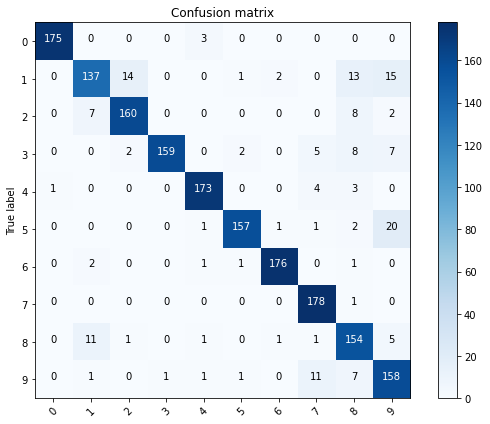

In [20]:
plot_confusion_matrix(cnf_matrix, np.arange(10), normalize = False)

In [21]:
y_gnb = gnb.predict(X)
cnf_matrix = confusion_matrix(Y, y_gnb)
print(cnf_matrix)

[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


KeyError: ' misclass='

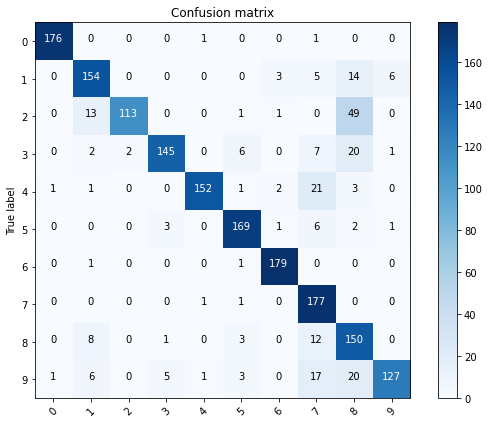

In [22]:
plot_confusion_matrix(cnf_matrix, np.arange(10), normalize = False)